In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [5]:
runs = {

    # '2023-05-08_13-59_dummy-test': {'desc' : 'output_dummy_rot'},
    # '2023-05-08_14-31_dummy-test': {'desc' : 'output_rot'},
    # '2023-05-08-14-40_last_night': {'desc' : 'last_night'},
    '2023-05-10_12-31_dummy-test' : {'desc' : 'data_half'},
}

history_keys = {'loss_history', 'epoch_loss_history' , 'val_loss_history'}

for dir in runs:
    filename = lambda h : 'train_results/' + dir + f'/{h}.json'
    histories = {h: json.load(open(filename(h))) for h in history_keys if os.path.isfile(filename(h))}
    runs[dir]['histories'] = histories

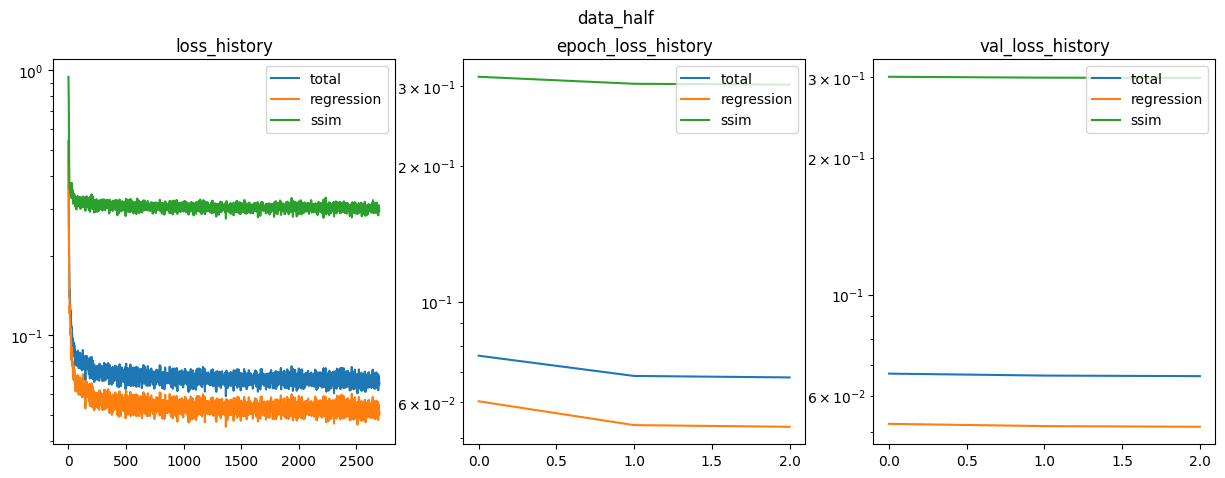

In [8]:
for dir in runs:
    histories = runs[dir]['histories']
    desc = runs[dir]['desc']

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, (h, history) in enumerate(histories.items()):
        for k, loss in history.items():
            axs[i].plot(loss, label=k)
            axs[i].set_yscale('log')
        axs[i].set_title(h)
        axs[i].legend(loc = 'upper right')
    fig.suptitle(desc)
    plt.show()